
--- Dataset 2 cm ---
Linear Regression Model: y = -1.359342x + 0.022693
R² Score: 0.5849
Mean Absolute Error (MAE): 0.012935
Mean Squared Error (MSE): 0.000273


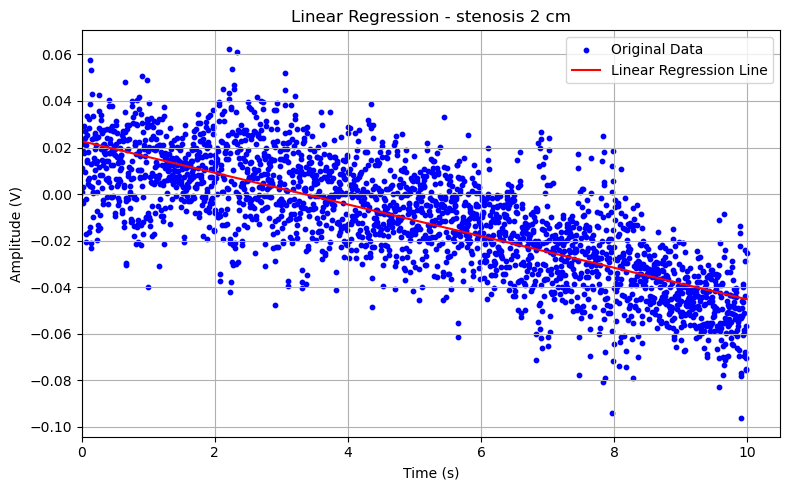


--- Dataset 3 cm ---
Linear Regression Model: y = 3.608444x + -0.097866
R² Score: 0.6507
Mean Absolute Error (MAE): 0.030327
Mean Squared Error (MSE): 0.001456


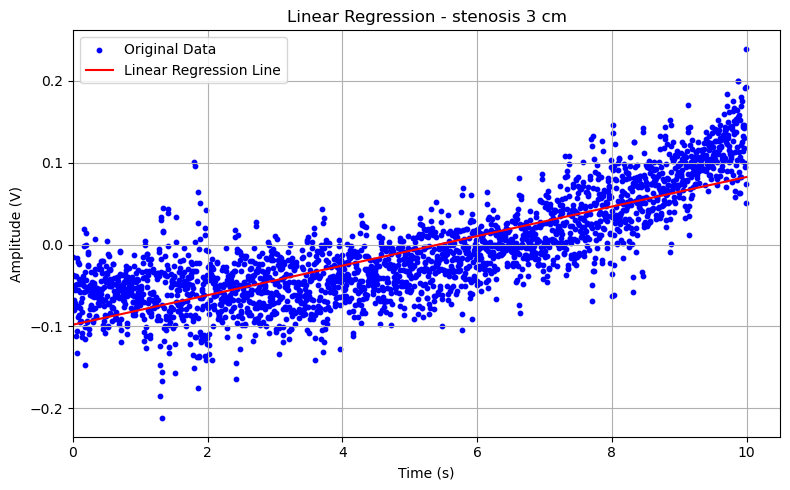


--- Dataset 6 cm ---
Linear Regression Model: y = 0.699717x + -0.014247
R² Score: 0.5498
Mean Absolute Error (MAE): 0.006953
Mean Squared Error (MSE): 0.000084


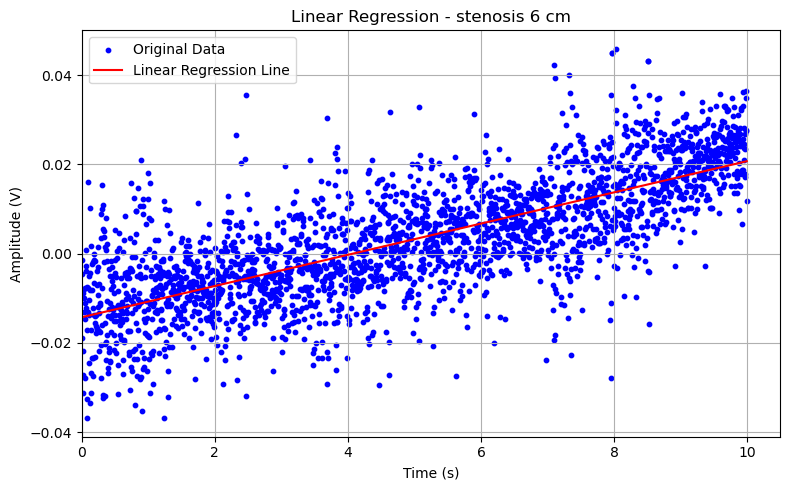

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # --- Step 1: Load CSVs ---

""" # --- Step 1: Load CSVs ---
df1 = pd.read_csv('C:\\Users\\PC\\Desktop\\jacques\\LibTiePie-Python-examples_v0.63\\record_2_70_bis\\betterRecorded_signal_06.csv')
df2 = pd.read_csv('C:\\Users\\PC\\Desktop\\jacques\\LibTiePie-Python-examples_v0.63\\record_3_70_bis\\betterRecorded_signal_01.csv')
df3 = pd.read_csv('C:\\Users\\PC\\Desktop\\jacques\\LibTiePie-Python-examples_v0.63\\record_6_50\\betterRecorded_signal_07.csv') """



df1 = pd.read_csv('betterRecorded_signal_06.csv')
df2 = pd.read_csv('betterRecorded_signal_01.csv')
df3 = pd.read_csv('betterRecorded_signal_07.csv')

# --- Step 2: Convert 'Time' to numeric & sort ---
for df in [df1, df2, df3]:
    df['Time'] = pd.to_numeric(df['Time (s)'], errors='coerce')
    df.dropna(subset=['Time'], inplace=True)
    df.sort_values('Time', inplace=True)

# --- Step 3: Rename amplitude columns ---
df1.rename(columns={'Amplitude (V)': 'Amplitude1'}, inplace=True)
df2.rename(columns={'Amplitude (V)': 'Amplitude2'}, inplace=True)
df3.rename(columns={'Amplitude (V)': 'Amplitude3'}, inplace=True)

# --- Step 4: Perform Linear Regression on Each Dataset ---
datasets = [(df1, 'Amplitude1'), (df2, 'Amplitude2'), (df3, 'Amplitude3')]

for i, (df, amp_col) in enumerate(datasets, start=1):
    X = df[['Time']].values
    y = df[amp_col].values

    # Create and train model
    model = LinearRegression()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # --- Step 5: Evaluate Performance ---
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    if i==1:
        i='2 cm'
    elif i==2:
        i='3 cm'
    elif i==3:
        i='6 cm'

    print(f"\n--- Dataset {i} ---")
    print(f"Linear Regression Model: y = {model.coef_[0]:.6f}x + {model.intercept_:.6f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.6f}")
    print(f"Mean Squared Error (MSE): {mse:.6f}")
    

    # --- Step 6: Plot Results ---
    plt.figure(figsize=(8, 5))
    plt.scatter(X*200, y, color='blue', label='Original Data', s=10)
    plt.plot(X*200, y_pred, color='red', label='Linear Regression Line')
    plt.title(f'Linear Regression - stenosis {i}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.xlim(left=0)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
